# Boston Housing Prices: Linear Regression

#### import data manipulation libraries

In [1]:
import os
import pandas as pd
import numpy as np

#### import visualization libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### import libraries from sklearn

In [3]:
from sklearn import datasets #boston housing prices data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,  cross_val_score #training, testing, & validation
from sklearn.metrics import mean_squared_error, r2_score # pperformance of the model

## Step 1 : Loading the dataset

In [6]:
df_boston = pd.read_csv("Boston_Housing_Dataset.csv")

In [7]:
df_boston.head(2)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


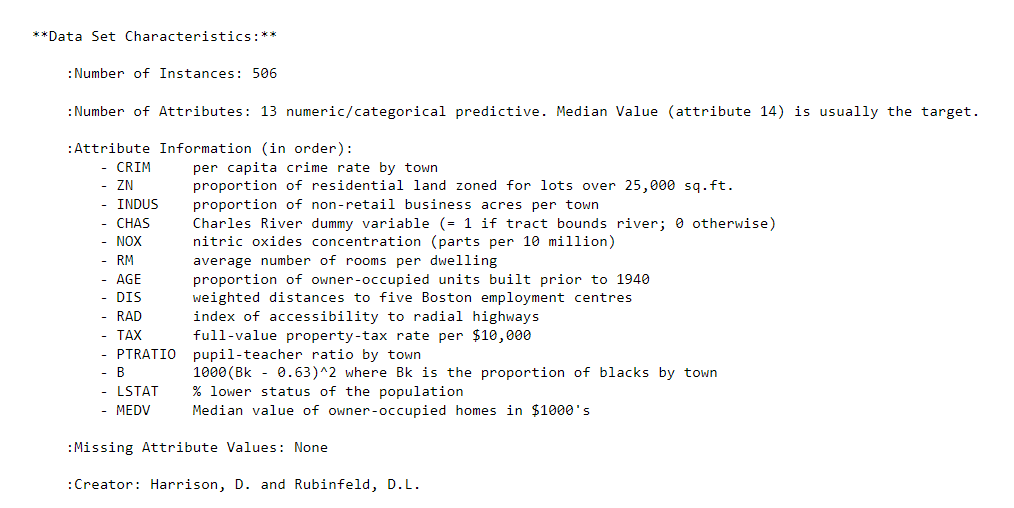

# Step 2: Exploratory Data Analysis

In [8]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


### Check for any missing values

In [9]:
df_boston.isna().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

`There are no missing values in any of the variables`

### Plot a histogram to show how the prices are distributed

In [10]:
plt.style.use('fivethirtyeight') #theme

[]

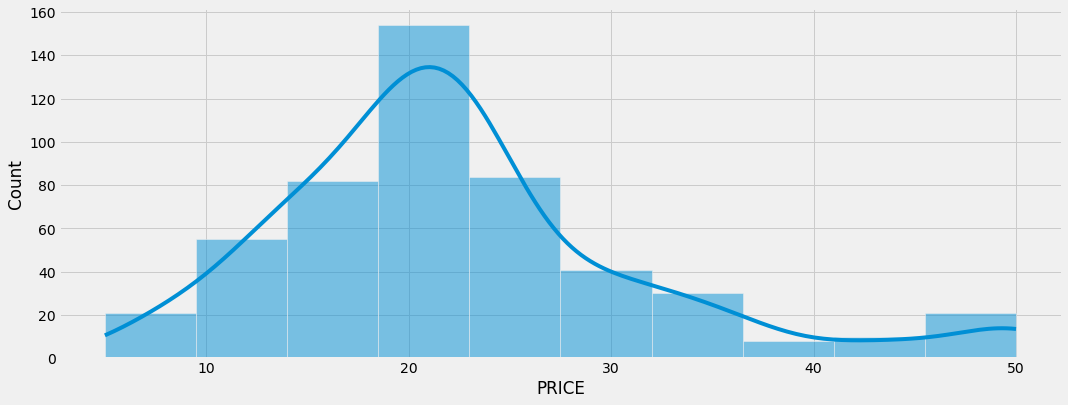

In [11]:
plt.subplots(figsize=(16,6))
sns.histplot(df_boston['PRICE'], bins=10, kde=True)
plt.plot()

In [12]:
df_boston['PRICE'].mean()

22.532806324110698

In [13]:
df_boston['PRICE'].median()

21.2

In [14]:
df_boston[df_boston['PRICE']>45]

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
203,203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
204,204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
228,228,0.29819,0.0,6.20,0.0,0.5040,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7


In [15]:
df_boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Step 3: Feature Engineering

- feature - independent/input / predictor variables
- Engineering - transforming the variables

## Correlation Coefficient

In [16]:
df_boston

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
df_boston.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

#### Drop the unnamed column

In [18]:
df_boston.drop(columns=['Unnamed: 0'], inplace = True)

In [19]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Correlation Plot 
### `helps to do the feature selection`

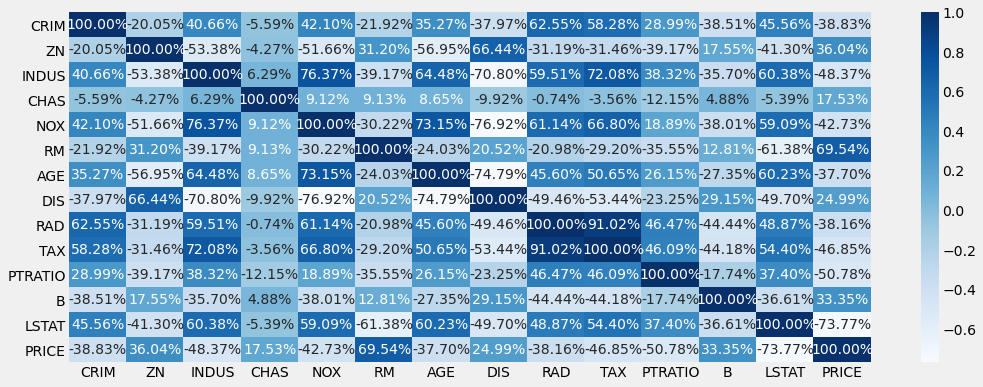

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(df_boston.corr(), cmap = 'Blues',  annot=True, fmt = '.2%')
plt.show()

In [23]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [24]:
sel_col = ['PRICE','LSTAT','RM','TAX']

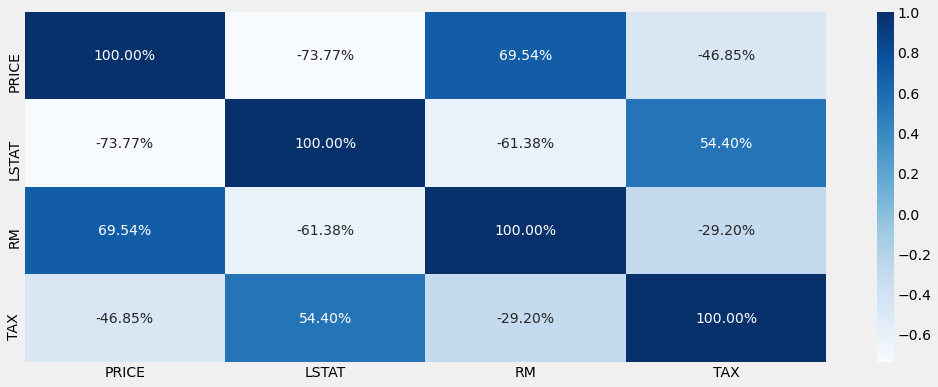

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(df_boston[sel_col].corr(), cmap = 'Blues',  annot=True, fmt = '.2%')
plt.show()

## Generate a mask for the upper triangle

In [26]:
mask = np.triu(np.ones_like(df_boston.corr(), dtype=bool))

In [29]:
mask.shape

(14, 14)

In [30]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

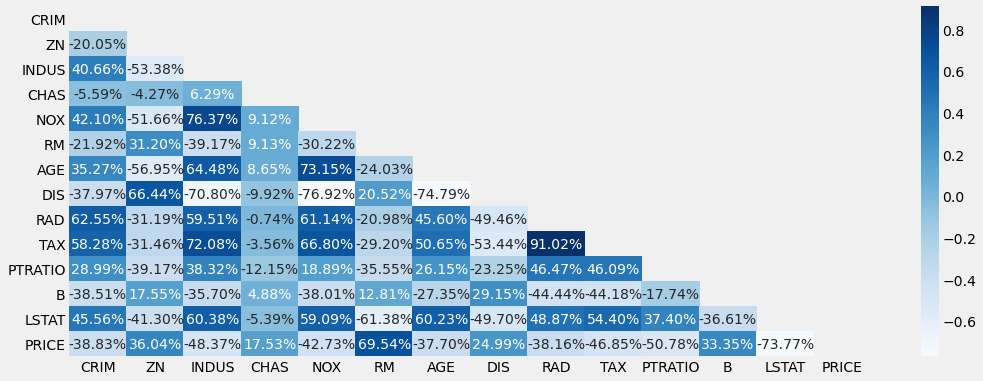

In [31]:
plt.figure(figsize=(16,6))
sns.heatmap(df_boston.corr(), mask = mask, cmap = 'Blues',  annot=True, fmt = '.2%')
plt.show()

## Simple Linear Regression Model

**`using variable - RM`** & target variable is 'PRICE'

# Step: 4 Building Machine Learning Model

## Splitting data as training, validation and testing data sets

In [45]:
X = df_boston['RM']

In [46]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [47]:
type(X)

pandas.core.series.Series

In [48]:
df_boston['RM'].min() # minimum average no. of rooms

3.561

In [49]:
df_boston['RM'].max() # maximum average no. of rooms

8.78

In [50]:
X = np.array(X).reshape(-1,1) #tranform the pandas series to the required format

In [51]:
X.shape

(506, 1)

In [52]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [53]:
X.ndim

2

In [54]:
y = df_boston['PRICE']

In [55]:
y = np.array(y).reshape(-1,1)

In [56]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [113]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X, y, test_size= 0.20, random_state= 5 )

In [114]:
X_train_1.shape

(404, 1)

In [115]:
X_train_1

array([[5.701],
       [7.923],
       [5.957],
       [6.12 ],
       [6.404],
       [4.97 ],
       [6.162],
       [4.973],
       [6.696],
       [5.981],
       [6.471],
       [7.107],
       [6.655],
       [6.13 ],
       [5.604],
       [6.03 ],
       [6.004],
       [5.593],
       [5.968],
       [7.42 ],
       [6.31 ],
       [5.706],
       [5.998],
       [6.781],
       [6.209],
       [5.951],
       [6.021],
       [7.875],
       [7.802],
       [6.373],
       [5.818],
       [6.151],
       [6.545],
       [6.113],
       [5.427],
       [4.652],
       [6.456],
       [6.739],
       [6.023],
       [6.152],
       [5.456],
       [5.868],
       [7.274],
       [5.875],
       [6.575],
       [5.741],
       [6.474],
       [6.345],
       [5.857],
       [7.016],
       [6.459],
       [6.193],
       [6.75 ],
       [7.249],
       [5.454],
       [6.487],
       [6.998],
       [7.163],
       [6.749],
       [6.975],
       [5.399],
       [6.968],
       [

In [116]:
X_train_1.sum()

2540.536

In [117]:
df_boston.shape

(506, 14)

In [118]:
404/506 *100 # 80% is training

79.84189723320159

In [119]:
y_train_1.shape

(404, 1)

In [120]:
X_val_1.shape

(102, 1)

In [121]:
102/506*100 #20% data kept for validation

20.158102766798418

- `random_state` parameter sets the random seed to ensure the reproductibility of the split
- By using this, we will see the same split each time code is run

## Training the model

In [123]:
lin_sr_model_1 = LinearRegression() # Call the linear regression from the sklearn library

In [124]:
lin_sr_model_1

LinearRegression()

In [125]:
lin_sr_model_1.fit(X_train_1, y_train_1)

LinearRegression()

`fit: implies training`

## Validating the model

In [127]:
y_val_predicted_1 = lin_sr_model_1.predict(X_val_1)

In [129]:
y_val_predicted_1.shape

(102, 1)

## Root Mean Squared Error

In [130]:
rmse = np.sqrt(mean_squared_error(y_val_1, y_val_predicted_1))

In [131]:
rmse

4.895963186952217

In [132]:
y.min()

5.0

In [133]:
y.max()

50.0

In [134]:
print("The model performance for validaiton set:")
print("-----------------------------------")
print("Root Mean Square Error:{}".format(rmse))
print("-----------------------------------")


The model performance for validaiton set:
-----------------------------------
Root Mean Square Error:4.895963186952217
-----------------------------------


### Let us do some plotting

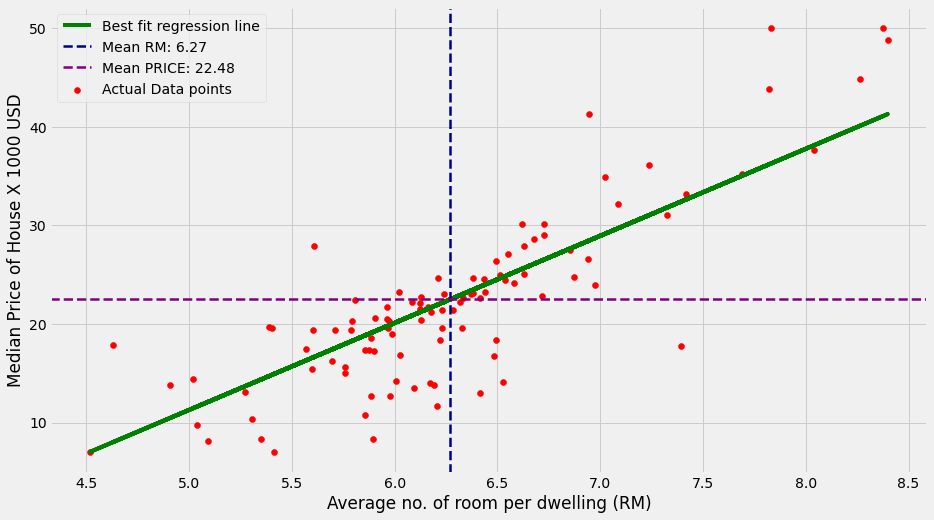

In [151]:
plt.subplots(figsize=(14,8))
plt.scatter(X_val_1, y_val_1, color='red', label="Actual Data points") #actual data points
plt.xlabel("Average no. of room per dwelling (RM)")
plt.ylabel("Median Price of House X 1000 USD")
plt.plot(X_val_1, y_val_predicted_1, color="green", label = "Best fit regression line") #best fit line


### Add mean lines for RM and Price both
plt.axvline(x=X_val_1.mean(), color= 'darkblue', linestyle='dashed', linewidth=2.5, label=f'Mean RM: {X_val_1.mean():.2f}') #RM avg value
plt.axhline(y=y_val_predicted_1.mean(), color= 'purple', linestyle='dashed', linewidth=2.5, label=f'Mean PRICE: {y_val_predicted_1.mean():.2f}') #Price avg value

plt.legend()
plt.show()

### Display linear regression coefficients and R-squared value of the model:

In [153]:
lin_sr_model_1.intercept_

array([-32.83912991])

In [154]:
lin_sr_model_1.coef_

array([[8.82345634]])

In [ ]:
y_train_1

### Calculate R-squared -- Coefficient of determination

In [162]:
print('Coefficient of Determination: R^2', lin_sr_model_1.score(X_val_1, y_val_1))

Coefficient of Determination: R^2 0.6938399401553497


-- **RMSE** provides a measure of the average magnitude of the errors made by the model in absolute sense

-- **R^2** measures the proportion of variance in the price which is predictable / explained from/by RM variable. Higher R^2 means better fit of the model however it doesn't convey information about the magnitude of the errors

### Multiple Linear Regression

### including two variables - `RM (+ve Corr.)  & LSTAT (-ve Corr.)`

In [165]:
X = df_boston[['RM','LSTAT']]

In [166]:
X

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [167]:
y = df_boston["PRICE"]

### Splitting data as training & validation sets

In [168]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, y, test_size=0.2, random_state=5)

In [169]:
X_train_2

,RM,LSTAT
33,5.701,18.35
283,7.923,3.16
418,5.957,20.62
502,6.120,9.08
402,6.404,20.31
...,...,...
486,6.114,14.98
189,7.185,5.39
495,5.670,17.60
206,6.326,10.97


### Training the model

In [170]:
lin_mr_model_2 = LinearRegression()

In [171]:
lin_mr_model_2.fit(X_train_2, y_train_2)

LinearRegression()

### Predict the validation set

In [172]:
y_val_predicted_2 = lin_mr_model_2.predict(X_val_2) #Predict Price for the validation set

### Calculate the performance metrics

In [173]:
rmse2 = np.sqrt(mean_squared_error(y_val_2, y_val_predicted_2)) # Comparing the actual vs predicted price

In [174]:
rmse2

5.137400784702911

In [175]:
r2_score(y_val_2, y_val_predicted_2) # 66.2%

0.6628996975186953

### Multiple Linear Regression

### including two variables - `RM & TAX `

In [176]:
X = df_boston[['RM','TAX']]

In [177]:
X

,RM,TAX
0,6.575,296.0
1,6.421,242.0
2,7.185,242.0
3,6.998,222.0
4,7.147,222.0
...,...,...
501,6.593,273.0
502,6.120,273.0
503,6.976,273.0
504,6.794,273.0


In [178]:
y = df_boston["PRICE"]

### Splitting data as training & validation sets

In [179]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, y, test_size=0.2, random_state=5)

In [180]:
X_train_2

,RM,TAX
33,5.701,307.0
283,7.923,198.0
418,5.957,666.0
502,6.120,273.0
402,6.404,666.0
...,...,...
486,6.114,666.0
189,7.185,398.0
495,5.670,391.0
206,6.326,277.0


### Training the model

In [181]:
lin_mr_model_2 = LinearRegression()

In [182]:
lin_mr_model_2.fit(X_train_2, y_train_2)

LinearRegression()

### Predict the validation set

In [183]:
y_val_predicted_2 = lin_mr_model_2.predict(X_val_2) #Predict Price for the validation set

### Calculate the performance metrics

In [184]:
rmse2 = np.sqrt(mean_squared_error(y_val_2, y_val_predicted_2)) # Comparing the actual vs predicted price

In [185]:
rmse2

4.424926377335585

In [186]:
r2_score(y_val_2, y_val_predicted_2) # 74.9%

0.7499168993835434

### Reading Assignment - `CORRELATION IS NOT CAUSALITY`

-- Cause and Effect